In [92]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load and preprocess the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape the input data to be 4D (batch_size, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes (0-9)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# # Evaluate the model on the test set
# test_loss, test_acc = model.evaluate(x_test, y_test)
# print(f'Test accuracy: {test_acc}')

Epoch 1/5
844/844 [==============================] - 51s 45ms/step - loss: 0.1924 - accuracy: 0.9406 - val_loss: 0.0566 - val_accuracy: 0.9823
Epoch 2/5
844/844 [==============================] - 36s 43ms/step - loss: 0.0541 - accuracy: 0.9832 - val_loss: 0.0373 - val_accuracy: 0.9900
Epoch 3/5
844/844 [==============================] - 36s 43ms/step - loss: 0.0377 - accuracy: 0.9884 - val_loss: 0.0399 - val_accuracy: 0.9887
Epoch 4/5
844/844 [==============================] - 40s 48ms/step - loss: 0.0289 - accuracy: 0.9906 - val_loss: 0.0333 - val_accuracy: 0.9902
Epoch 5/5
844/844 [==============================] - 39s 46ms/step - loss: 0.0231 - accuracy: 0.9922 - val_loss: 0.0427 - val_accuracy: 0.9890


313/313 [==============================] - 10s 9ms/step


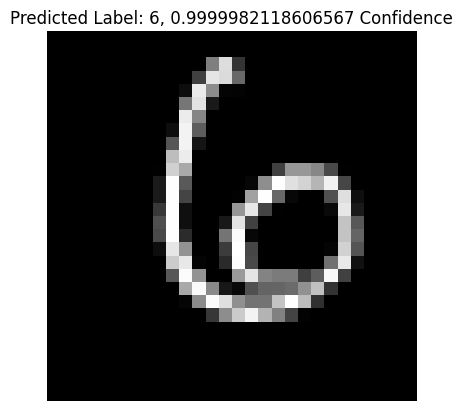

In [94]:
import matplotlib.pyplot as plt
import numpy as np

# Choose an index from the test set
index = 100

# Make predictions on the test set
predictions = model.predict(x_test)

# Get the predicted label for the chosen index
predicted_label = np.argmax(predictions[index])

# Display the test image
plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
plt.title(f'Predicted Label: {predicted_label}, {np.max(predictions[index])} Confidence')
plt.axis('off')
plt.show()


In [95]:
import tensorflow as tf

def compute_input_gradient(model, input_image, class_index=0):
    # Ensure the input image is in a TensorFlow Tensor format
    input_image = tf.convert_to_tensor(input_image)
    input_image = tf.expand_dims(input_image, axis=0)  # Add a batch dimension
    
    with tf.GradientTape() as tape:    # Context manager to record the gradient operations
        tape.watch(input_image)  # Start recording the gradient
        
        # Forward pass through the model
        predictions = model(input_image)
        
        # Get the predicted probability for the specified class
        predicted_prob = predictions[0, class_index]
    
    # Compute the gradient of the summed predictions with respect to the input image
    input_gradient = tape.gradient(predicted_prob, input_image)
    
    # Squeeze out the batch dimension
    input_gradient = tf.squeeze(input_gradient, axis=0)
    
    return input_gradient.numpy()  # Convert to NumPy array for easier manipulation

# Example usage:
# model: Your trained TensorFlow/Keras model
# input_image: The input image for which you want to compute the gradient
input_image = x_test[index]

# Compute the gradient
gradient = compute_input_gradient(model, input_image, class_index=5)


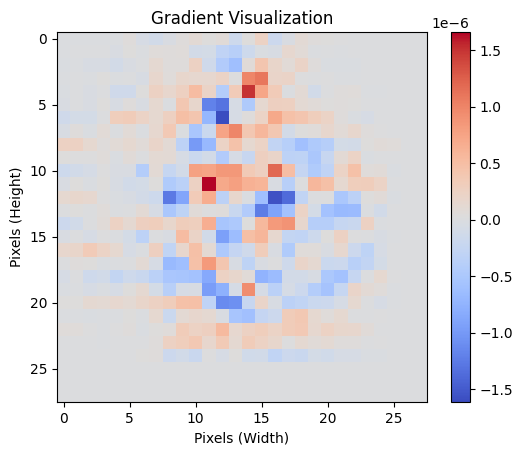

In [96]:
import matplotlib.pyplot as plt

# Assume gradient contains the gradient values in NumPy array format

# Plot the gradient
plt.imshow(gradient, cmap='coolwarm')
plt.colorbar()
plt.title('Gradient Visualization')
plt.xlabel('Pixels (Width)')
plt.ylabel('Pixels (Height)')
plt.show()


In [99]:
epsilon = 0.2  # Hyperparameter (small value)

reshaped_gradient = tf.reshape(gradient, input_image.shape)

# Add the sign of the gradient to the input image + a small epsilon value
adversarial_image = input_image + tf.sign(reshaped_gradient) * epsilon

# Clip the values of the adversarial image to be within the valid range (0, 1)
adversarial_image = tf.clip_by_value(adversarial_image, 0, 1)

# Convert the adversarial image to NumPy array for visualization
adversarial_image_np = adversarial_image.numpy()
adversarial_image_np = np.reshape(adversarial_image_np, (1, 28, 28, 1))

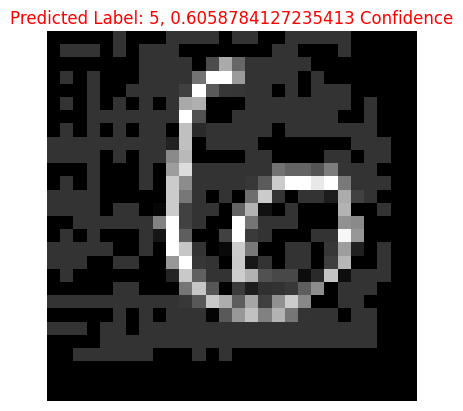

In [100]:
adversarial_image_tensor = tf.convert_to_tensor(adversarial_image_np)

# Make predictions using your trained model
predictions = model(adversarial_image_tensor)

# Get the predicted label
predicted_label = np.argmax(predictions)

# Display the adversarial image
plt.imshow(adversarial_image_np.reshape(28, 28), cmap='gray')
plt.axis('off')

# Print the predicted label above the image
plt.title(f'Predicted Label: {predicted_label}, {np.max(predictions)} Confidence', fontsize=12, color='red')

# Show the image with the predicted label
plt.show()